# 导入第三方库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import *
from math import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter
import seaborn as sns

# 数据输入和准备

In [2]:
otu_label = pd.read_csv("otutab_all.csv",header=0,index_col=0)
otu = otu_label.drop("label",axis=1)
label = otu_label["label"]
label[label=="XR"] = "2"
label[label=="JK"] = "1"
label[label=="JZ"] = "4"
label[label=="FJ"] = "3"
label[label=="CR"] = "5"

<ipython-input-2-4a4b3579e5db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="XR"] = "2"
<ipython-input-2-4a4b3579e5db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="JK"] = "1"
<ipython-input-2-4a4b3579e5db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="JZ"] = "4"
<ipython-input-2-4a4b3579e5db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [3]:
##-------------------定义特征筛选函数----------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def filter(otu_f,thread):
    n = len(otu_f)
    columns = otu_f.columns
    indexs = otu_f.index
    # 删除表达低的特征并对样本进行归一化
    for col in columns:
        more_thread = round(len(otu_f.loc[otu_f[col]>thread,col])/n,2)*100
        if more_thread < 10:
            otu_f.drop(col,axis=1,inplace=True)
    mm = MinMaxScaler()
    mm_data = mm.fit_transform(np.transpose(otu_f))
    otu_result = pd.DataFrame(np.transpose(mm_data))
    otu_result.columns = otu_f.columns     
    return otu_result
otu_filter = otu
otu_filter = filter(otu_filter,10)

In [4]:
otu_filter.index = otu.index
otu_filter = np.transpose(otu_filter)

In [5]:
numeric_cols = otu_filter.columns[otu_filter.dtypes != "object"]
numeric_col_sum =otu_filter.loc[:,numeric_cols].sum()
otu_filter.loc[:,numeric_cols] = otu_filter.loc[:,numeric_cols]/numeric_col_sum*100
otu_label=pd.concat([label, np.transpose(otu_filter)], axis=1)

In [6]:
otu = otu_label.drop("label",axis=1)
label = otu_label["label"]

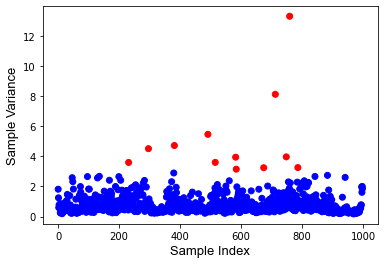

In [7]:
font1 = {'family':'Arial',
'weight' : 'normal',
'size'   : 13,
}

arr_var = np.var(otu,axis=1)
label_C = []
for i in arr_var:
    if i > 3:
        label_C.append(1)
    else:
        label_C.append(0)
plt.scatter(range(0,999),arr_var,c=label_C,cmap="bwr") 
plt.xlabel("Sample Index",fontdict=font1)
plt.ylabel("Sample Variance",fontdict=font1)
#对于x刻度的设置
plt.savefig("raw_sample_var.svg", format="svg") #保存矢量图

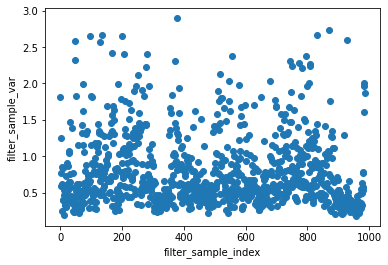

In [8]:
arr_var[arr_var<=4]
otu_filter1 = otu[np.var(otu,axis=1)<=3]
arr_var = np.var(otu_filter1,axis=1)
plt.scatter(range(0,len(arr_var)),arr_var) 
plt.xlabel("filter_sample_index")
plt.ylabel("filter_sample_var")
plt.savefig("filter_sample_var.svg", format="svg") #保存矢量图

In [9]:
index = otu_filter1.index
label = label[index]

In [10]:
otu_label=pd.concat([label, otu_filter1], axis=1)

In [11]:
Counter(otu_label["label"])

Counter({'5': 200, '3': 197, '1': 195, '4': 195, '2': 200})

In [12]:
# import seaborn as sns
# a = list(feature_imp.head(5).index)
# a.append("label")
# data = pd.DataFrame(otu_label[a])
# sns.pairplot(data,hue="label")
# plt.savefig("otu-feature_xianguan.svg",format="svg")

In [13]:
# import scipy.stats as ss
# #导入相应的模块
# a = list(feature_imp.head(5).index)
# sns.set_context(font_scale=1.5)
# #设置字体大小为1.5倍
# df = pd.DataFrame(otu_label[a])
# #读入数据
# sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128),annot=True, square=True)
# #画热力图，图例最小值 -1，最大值1，颜色对象设为红蓝('RdBu'),颜色数目为128
# plt.savefig("OTU-xianguan-retu.svg",format="svg")

In [14]:
Counter(label)
# otu_label.to_csv("otu_label_all0316.csv",index=1)

Counter({'5': 200, '3': 197, '1': 195, '4': 195, '2': 200})

# 训练集和测试集划分

In [15]:
##---------训练集和测试集划分---------未考虑测序批次
# X = otu_label[filter_feature.index]
X=otu_label.drop(['label'], axis=1)# Features
y=otu_label['label']
# otu_label.to_csv("otutab_norm.csv",index=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2050,shuffle=True)
X_train

,Otu133,Otu2,Otu159,Otu138,Otu37,Otu13,Otu26,Otu60,Otu4,Otu112,...,Otu317,Otu428,Otu439,Otu289,Otu336,Otu421,Otu481,Otu344,Otu469,Otu151
CRC06,0.000000,2.369223,0.000000,0.872542,1.045798,15.060744,17.891287,1.924602,0.715985,0.020874,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002087,0.000000,0.037574
CR089,0.166032,9.261585,0.000000,0.048958,2.145640,0.334192,1.562400,0.072373,1.858277,0.106431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.053215,0.000000,0.000000,0.000000,0.000000
XR030,0.000000,5.285794,0.004155,0.004155,0.193231,0.941220,0.623325,0.043633,5.877953,0.006233,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004155,0.000000,0.008311
JZB05,0.000000,4.892790,0.000000,0.024670,0.550953,0.861378,0.051395,0.141850,5.186769,0.012335,...,0.000000,0.008223,0.000000,0.000000,0.000000,0.000000,0.094567,0.678412,0.000000,0.000000
CR055,0.000000,12.812989,0.002142,0.023561,0.865337,2.497483,0.848202,0.263457,1.477927,0.057832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JZ048,1.123888,5.356910,0.210458,0.006509,0.277718,7.012367,0.859189,0.229985,6.007811,0.036884,...,0.000000,0.000000,0.114992,0.000000,0.028206,0.000000,0.000000,0.101974,0.041224,0.000000
XRG05,0.008482,4.334365,0.000000,0.086942,0.243861,1.234149,0.163281,0.233258,2.550999,0.012723,...,0.002121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008482,0.000000
FJ037,0.000000,3.155032,0.004151,0.026984,0.244930,0.014530,0.043589,0.514768,2.279096,0.051892,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002076,0.000000
XRA04,0.049357,3.167450,0.002146,0.002146,0.081547,0.336917,0.150218,0.021460,4.317689,0.004292,...,0.023606,0.000000,0.000000,0.100861,0.109444,0.000000,0.000000,0.109444,0.000000,0.289706


In [16]:
otu_label = pd.read_csv("1285otu_all.csv",index_col=0,sep = "\t")
label = pd.read_csv("286label",sep = "\t",index_col=0)
label = label["true"]
otu_286 = otu_label[otu_label.index.isin(label.index)] 
label[label=="XR"] = "PL"
label[label=="JK"] = "HI"
label[label=="JZ"] = "AA"
label[label=="FJ"] = "NAA"
Counter(label)

Counter({'PL': 53, 'AA': 47, 'NAA': 42, 'CR': 57, 'HI': 87})

In [17]:
otu_filter = otu_286[otu.columns]
otu_filter = np.transpose(otu_filter)

In [ ]:
numeric_cols = otu_filter.columns[otu_filter.dtypes != "object"]
numeric_col_sum =otu_filter.loc[:,numeric_cols].sum()
otu_filter.loc[:,numeric_cols] = otu_filter.loc[:,numeric_cols]/numeric_col_sum*100
otu_label=pd.concat([label, np.transpose(otu_filter)], axis=1)
otu_label

In [ ]:
X_test = otu_label.drop(['true'], axis=1)
y_test = otu_label["true"]

## 模型构建及参数调优 

模型一：随机森林

In [16]:
param = {
    'n_estimators':range(1,50,10),
    'max_features':range(1,10,1)
}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(random_state=2050),
                        param_grid = param,
                        cv=5,n_jobs=-1)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2050),
             n_jobs=-1,
             param_grid={'max_features': range(1, 10),
                         'n_estimators': range(1, 50, 10)})

In [17]:
best_estimator = gsearch1.best_estimator_
print(f'best params:{gsearch1.best_params_}')
print('best accuracy:%f' % gsearch1.best_score_)
print(best_estimator)

best params:{'max_features': 7, 'n_estimators': 41}
best accuracy:0.847826
RandomForestClassifier(max_features=7, n_estimators=41, random_state=2050)


In [18]:
#对训练集进行交叉验证
scores = cross_val_score(best_estimator, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.85 (+/- 0.04)


In [19]:
#对测试集进行测试
best_estimator.fit(X_train,y_train)
y_pred=best_estimator.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.835016835016835


In [20]:
y_test_pred=best_estimator.predict_proba(X_test)

In [21]:
alldata = pd.DataFrame(pd.concat([pd.DataFrame(y_test._stat_axis.values.tolist(),columns=['Sample']),
                             pd.DataFrame(y_test.values,columns=['True_label']),
                             pd.DataFrame(y_pred,columns=['Pred_label']),
                             pd.DataFrame(np.array(X_test),columns=X_test.columns)
                            ],axis=1))
# alldata.to_csv('alldata.csv',index=0)

In [22]:
importance = best_estimator.feature_importances_
feature_imp = pd.Series(importance,index=X_train.columns).sort_values(ascending=False)
feature_imp

Otu325    0.012742
Otu511    0.012560
Otu153    0.008817
Otu367    0.007053
Otu202    0.006339
            ...   
Otu578    0.000260
Otu4      0.000198
Otu398    0.000190
Otu421    0.000133
Otu250    0.000065
Length: 561, dtype: float64

In [23]:
filter_feature = feature_imp[feature_imp.values>0.003] 
filter_feature  = filter_feature.head(20)
len(filter_feature)

20

In [ ]:
# plot feature importance
indices = np.argsort(filter_feature)
selectn = filter_feature.shape[0]
fig=plt.figure(figsize=(10,13))
ax=fig.add_subplot(111)
font1 = {'family':'Arial',
'weight' : 'normal',
'size'   : 15,
}
ax.barh(range(selectn),filter_feature[indices])
ax.set_yticks(range(selectn))
ax.set_yticklabels([item.upper() for item in indices[::-1].index],fontdict=font1)
ax.set_title('Feature Importance',fontdict=font1)
plt.tight_layout()
plt.savefig("feature_improtance.svg",format="svg")
plt.show()

In [ ]:
[item.upper() for item in indices[::-1].index]

# 模型评估

In [24]:
#混淆矩阵
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.93      0.89        59
           2       0.88      0.80      0.83        54
           3       0.70      0.92      0.79        48
           4       0.89      0.64      0.74        77
           5       0.88      0.97      0.92        59

    accuracy                           0.84       297
   macro avg       0.84      0.85      0.84       297
weighted avg       0.85      0.84      0.83       297



In [25]:
array_confusion = metrics.confusion_matrix(y_test, y_pred)
cm = array_confusion
array_confusion = array_confusion.T
array_confusion

array([[55,  1,  1,  8,  0],
       [ 2, 43,  1,  3,  0],
       [ 1,  5, 44, 12,  1],
       [ 1,  3,  1, 49,  1],
       [ 0,  2,  1,  5, 57]], dtype=int64)

In [26]:
cmap_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
             'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
             'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
             'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
             'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
             'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
             'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
             'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
             'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
             'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
             'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 
             'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
             'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
             'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
             'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 
             'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 
             'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 
             'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
             'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
             'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
len(cmap_list)

164

In [27]:
con = cm.T/cm.sum(axis=1)
con.T*100

array([[93.22033898,  3.38983051,  1.69491525,  1.69491525,  0.        ],
       [ 1.85185185, 79.62962963,  9.25925926,  5.55555556,  3.7037037 ],
       [ 2.08333333,  2.08333333, 91.66666667,  2.08333333,  2.08333333],
       [10.38961039,  3.8961039 , 15.58441558, 63.63636364,  6.49350649],
       [ 0.        ,  0.        ,  1.69491525,  1.69491525, 96.61016949]])

In [29]:
cm

array([[55,  2,  1,  1,  0],
       [ 1, 43,  5,  3,  2],
       [ 1,  1, 44,  1,  1],
       [ 8,  3, 12, 49,  5],
       [ 0,  0,  1,  1, 57]], dtype=int64)

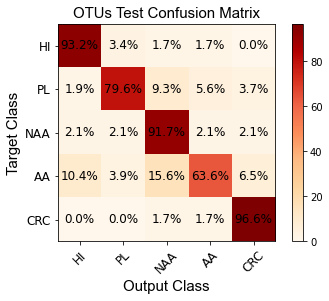

In [28]:
#绘制混淆矩阵图
def plot_confusion_matrix(cm,labels,cmap):
    font1 = {'family':'Arial',
    'weight' : 'normal',
    'size'   : 15,
    }
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=45,fontsize=12)
    plt.yticks(xlocations, labels,fontsize=12)
    plt.ylabel('Target Class',fontdict=font1)
    plt.xlabel('Output Class',fontdict=font1)
    plt.title("OTUs Test Confusion Matrix",fontdict=font1)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        plt.text(x_val, y_val, "%0.1f%%" % (c,), color='black', fontsize=12, va='center', ha='center')
    plt.savefig("confusion_matrix.svg",format="svg")
# labels = ['CR','FJ','JK','JZ','XR'] 
# labels = ['AA','CRC','HI','NAA','PL'] #五分类
labels = ['HI','PL','NAA','AA','CRC'] #五分类
# labels = ['JK','FJ','CR'] #三分类
plot_confusion_matrix(con.T*100,labels,"OrRd")

In [46]:
TP_0 = array_confusion[0,0]
FP_0 = sum(array_confusion[0,1:5])
FN_0 = sum(array_confusion[1:5,0])
TN_0 = sum(array_confusion[1,1:5]+array_confusion[2,1:5]+array_confusion[3,1:5]+array_confusion[4,1:5])-FN_0
# 输出肠癌的灵敏度和特异性
print('HI的灵敏度为：%.2f'%(TP_0/(TP_0+FN_0)))
print('HI的特异性为：%.2f'%(TN_0/(FP_0+TN_0)))

HI的灵敏度为：0.93
HI的特异性为：0.96


In [ ]:
TP_1 = array_confusion[1,1]
FP_1 = array_confusion[1,0]+sum(array_confusion[1,2:5])
FN_1 = array_confusion[0,1]+sum(array_confusion[2:5,1])
TN_1 = sum(array_confusion[0,:5])+sum(array_confusion[2,:5])+sum(array_confusion[3,:5])+sum(array_confusion[4,:5])-FN_1
# 输出非进展的灵敏度和特异性
print('PL的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('PL的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

In [ ]:
TP_1 = array_confusion[2,2]
FP_1 = sum(array_confusion[2,0:2])+sum(array_confusion[2,3:5])
FN_1 = sum(array_confusion[0:2,2])+sum(array_confusion[3:5,2])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[3,])+sum(array_confusion[4,])-FN_1
# 输出健康的灵敏度和特异性
print('NAA的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('NAA的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

In [ ]:
TP_1 = array_confusion[3,3]
FP_1 = sum(array_confusion[3,0:3])+sum(array_confusion[3,4:5])
FN_1 = sum(array_confusion[0:3,3])+sum(array_confusion[4:5,3])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[2,])+sum(array_confusion[4,])-FN_1
# 输出进展的灵敏度和特异性
print('AA的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('AA的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

In [ ]:
TP_1 = array_confusion[4,4]
FP_1 = sum(array_confusion[4,0:4])
FN_1 = sum(array_confusion[0:4,4])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[2,])+sum(array_confusion[3,])-FN_1
# 输出息肉的灵敏度和特异性
print('CRC的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('CRC的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))